<a href="https://colab.research.google.com/github/JavierElizondo1/Coder-Data-Science/blob/main/LigamxElizondoTrevi%C3%B1o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predecir el resultado de un partido de futbol.

##Albert Einstein una vez dijo: no todo lo que cuenta puede ser contado y no todo lo que puede ser contado cuenta.

####Realizaremos un analisis exploratorio de datos sobre el conjunto de datos de los partidos de la liga MX de la temporada 2012 al 2024. el objetivo es comprender que factores pueden influir en el resultado de un partido y determinar si exite relacion entre estos factores para poder predecir el resultado de un partido.

####Hipotesis 1: ¿Cuales son los resultados que mas se repiten? despues determina su porcentaje de frecuencia y cuanto representa en cantidad.

####Hipotesis 2: ¿Que es mas probable que suceda que el encuentro termine con menos de 2.5 goles o con mas?

#Analisis exploratorio de datos

####Realizaremos un analisis exploratorio de datos sobre el conjunto de datos de los partidos de la liga MX de la temporada 2012 al 2024. el objetivo es comprender que factores pueden influir en el resultado de un partido y determinar si exite relacion entre estos factores para poder predecir el resultado de un partido.


#Verificacion de valores nulos

####Se verifica si tenemos valores nulos en nustro conjunto de datos y en caso de obtener valores nulos se eliminaran del dataset.

In [ ]:
#Librerias Necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnarDataSource, HoverTool

#Cargar el conjunto de datos de resultados de liga mx
url = "LigaMXDataSet2.xlsx"
datos_ligamx = pd.read_excel(url)

#verificar valores nulos
print("\nValores nulos en el conjunto de datos:")
print(datos_ligamx.isnull().sum())




Valores nulos en el conjunto de datos:
Country              0
League               0
Season               0
Date                 0
Time                 0
Local                0
Visitante            0
GL                   0
GV                   0
Res                  0
PrL                  0
PrE                  0
PrV                  0
MaxPayoutL           0
MaxPayoutE           0
MaxPayoutV           0
AvgPayoutL           0
AvgPayoutE           0
AvgPayoutV           0
Matchday             0
Ciudad               0
PuntosPorPartido     0
Goles en conjunto    0
Marcador             0
dtype: int64


In [ ]:
datos_ligamx

,Country,League,Season,Date,Time,Local,Visitante,GL,GV,Res,...,AvgPayoutL,AvgPayoutE,AvgPayoutV,Matchday,Ciudad,PuntosPorPartido,Goles en conjunto,Marcador,Frecuencia Relativa,Porcentaje
0,Mexico,Liga MX,2012/2013,2012-07-21,19:30:00,Chiapas,Tigres UANL,0,4,V,...,2.74,3.10,2.51,sábado,Otro,3,4,0-4,NaN,NaN
1,Mexico,Liga MX,2012/2013,2012-07-21,21:30:00,Club Tijuana,Puebla,2,0,L,...,1.93,3.26,3.83,sábado,Otro,3,2,2-0,NaN,NaN
2,Mexico,Liga MX,2012/2013,2012-07-21,1900-01-01 17:00:00,Cruz Azul,Monarcas,0,0,E,...,2.00,3.26,3.56,sábado,CDMX,1,0,0-0,NaN,NaN
3,Mexico,Liga MX,2012/2013,2012-07-21,1900-01-01 17:00:00,Queretaro,Club Leon,0,2,V,...,3.26,3.18,2.16,sábado,Otro,3,2,0-2,NaN,NaN
4,Mexico,Liga MX,2012/2013,2012-07-22,19:00:00,Monterrey,Club America,0,0,E,...,1.92,3.37,3.79,domingo,Nuevo Leon,1,0,0-0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,Mexico,Liga MX,2023/2024,2024-03-17,19:00:00,Tigres UANL,Mazatlan FC,5,1,L,...,1.59,4.05,5.26,domingo,Nuevo Leon,3,6,5-1,NaN,NaN
3912,Mexico,Liga MX,2023/2024,2024-03-17,21:05:00,Guadalajara Chivas,Club America,0,0,E,...,3.58,3.47,2.00,domingo,Guadalajara,1,0,0-0,NaN,NaN
3913,Mexico,Liga MX,2023/2024,2024-03-17,1900-01-01 17:00:00,Atlas,Monterrey,1,2,V,...,3.52,3.34,2.06,domingo,Guadalajara,3,3,1-2,NaN,NaN
3914,Mexico,Liga MX,2023/2024,2024-03-18,19:00:00,Atl. San Luis,Pachuca,2,1,L,...,3.39,3.59,2.02,lunes,Otro,3,3,2-1,NaN,NaN


<ipython-input-51-7d07769f1828>:17: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



                         GL        GV       PrL       PrE       PrV  \
GL                 1.000000  0.007111  0.254891 -0.216092 -0.235099   
GV                 0.007111  1.000000 -0.195580  0.062761  0.213420   
PrL                0.254891 -0.195580  1.000000 -0.708349 -0.974147   
PrE               -0.216092  0.062761 -0.708349  1.000000  0.535162   
PrV               -0.235099  0.213420 -0.974147  0.535162  1.000000   
MaxPayoutL        -0.232970  0.205703 -0.909089  0.443786  0.950075   
MaxPayoutE         0.208647 -0.075737  0.703662 -0.943384 -0.544071   
MaxPayoutV         0.220912 -0.178341  0.919228 -0.749206 -0.865489   
AvgPayoutL        -0.237944  0.206627 -0.927374  0.467058  0.964861   
AvgPayoutE         0.215430 -0.076518  0.703739 -0.947229 -0.541381   
AvgPayoutV         0.226569 -0.181761  0.936635 -0.755410 -0.883459   
PuntosPorPartido   0.249464  0.084352  0.051095 -0.072446 -0.037851   
Goles en conjunto  0.759268  0.656161  0.065068 -0.122227 -0.038523   

     

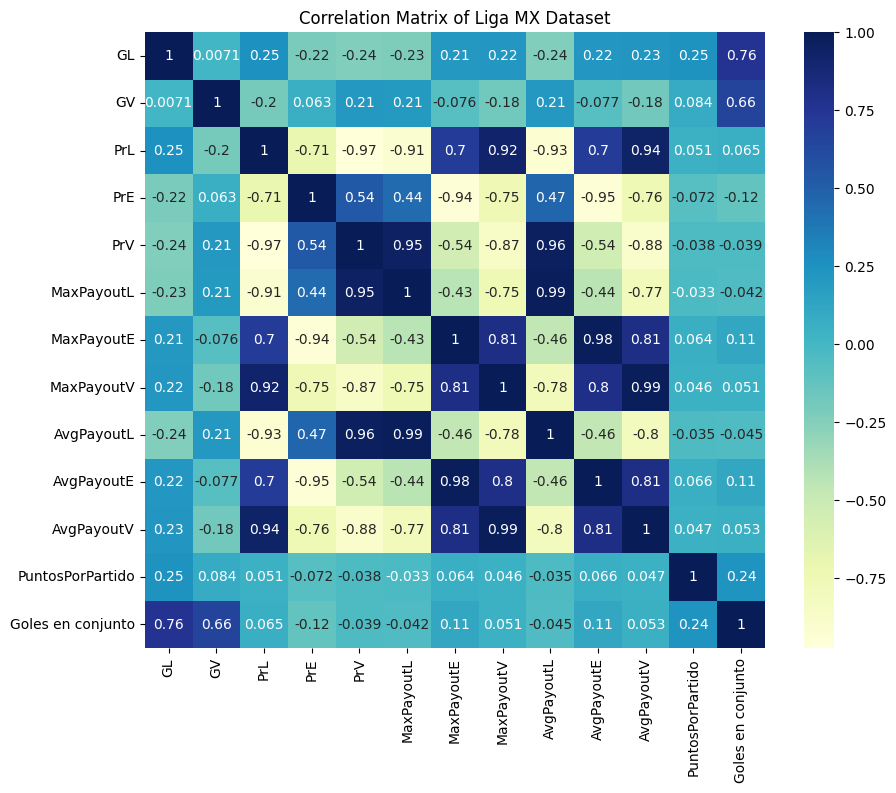

In [ ]:
# Correlacion datos_ligamx y grafica interactiva

# Importar las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnarDataSource, HoverTool

# cargar el dataset
url = "LigaMXDataSet2.xlsx"
datos_ligamx = pd.read_excel(url)

# Calcular la correlacion
correlation_matrix = datos_ligamx.corr()

print(correlation_matrix)

# Crear un mapa de calor con la matriz de correlaciones: donde podemos ver que cuando se pronostica que va a ganar el equipo local hay una correlacion positiva en puntos por partido y goles anotados y a su vez hay una correlacion negativa en el pago del casino ya sea en su expresion maxima MAXPAYL o promedio AVGPAYL
plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix of Liga MX Dataset")
plt.show()

# crear grafica de scatter
scatter_matrix = px.scatter_matrix(datos_ligamx, dimensions=["GL", "GV", "Res"], color="Res")
scatter_matrix.update_traces(diagonal_visible=False)
scatter_matrix.show()


In [ ]:
#Hipotesis 1. ¿cuales son los resultados mas comunes?

import plotly.express as px

# Crea una grafica de barras con la informacion
fig = px.bar(datos_ligamx, x="Marcador", color="Marcador", text="Marcador", title="Frecuencia de resultados en la Liga MX")

# Ordena las barras en orden decendente
fig.update_xaxes(categoryorder="total descending")

fig.show()


In [217]:
#Hipotesis 21. ¿cuales son los resultados mas comunes? determina el porcentaje de sucesos de cada resultado? y divide el total_partidos entre porcentajes_resultados

total_partidos = datos_ligamx.shape[0]
porcentajes_resultados = datos_ligamx['Marcador'].value_counts(normalize=True) * 100
resultados_comunes = pd.DataFrame({'Resultado': porcentajes_resultados.index, 'Porcentaje': porcentajes_resultados.values})
resultados_comunes['Porcentaje'] = resultados_comunes['Porcentaje'].round(2)
resultados_comunes['Total Partidos'] = (resultados_comunes['Porcentaje'] * total_partidos / 100).astype(int)

print("\nTotal de partidos en este dataset:")
print(total_partidos)
print("\nPorcentajes de cada resultado y su resultado en numero")
print(resultados_comunes)

#Hipotesis 1. ¿cuales son los resultados mas comunes mostrado en grafica?

import plotly.express as px

# Crea una grafica de barras con la informacion
fig = px.bar(datos_ligamx, x="Marcador", color="Marcador", text="Marcador", title="Frecuencia de resultados en la Liga MX")
fig.update_xaxes(categoryorder="total descending")

fig.show()


Total de partidos en este dataset:
3916

Porcentajes de cada resultado y su resultado en numero
   Resultado  Porcentaje  Total Partidos
0        1-1       13.56             531
1        1-0       10.21             399
2        2-1        9.32             364
3        0-1        8.02             314
4        0-0        7.61             298
5        1-2        7.23             283
6        2-0        7.05             276
7        2-2        5.49             214
8        3-1        4.44             173
9        3-0        3.93             153
10       0-2        3.88             151
11       3-2        3.19             124
12       1-3        2.68             104
13       2-3        1.97              77
14       0-3        1.79              70
15       4-1        1.74              68
16       4-0        1.51              59
17       3-3        0.87              34
18       1-4        0.77              30
19       4-2        0.77              30
20       2-4        0.54              21
2

In [211]:
# Grafico con todos los marcadores y cuantas veces se ha repetido Res: V=Visitante L=Local E=Empate

import plotly.express as px
import plotly.express as px

fig = px.histogram(datos_ligamx, x="Marcador", title='Grafico con todos los marcadores y cuantas veces se ha repetido. Res: V=Visitante L=Local E=Empate', color="Res")
fig.update_layout(xaxis_title='Goles en conjunto', yaxis_title='Conteo')
fig.show()


In [218]:
# Tabla con el index Marcadores que la columna de Goles en conjunto no sea mayor a 2.5 en porcentaje y agregar la cantidad de veces que ha sucedido

# Calcular el porcentaje de partidos con menos de 2.5 goles en conjunto
porcentaje_menos_2_5 = (datos_ligamx['GL'] + datos_ligamx['GV'] <= 2.5).sum() / datos_ligamx.shape[0] * 100

# Calcular el porcentaje de partidos con más de 2.5 goles
porcentaje_mas_2_5_goles = datos_ligamx[datos_ligamx['GL'] + datos_ligamx['GV'] > 2.5].shape[0] / datos_ligamx.shape[0] * 100

# Calcular la cantidad de partidos con menos de 2.5 goles en conjunto
cantidad_menos_2_5 = (datos_ligamx['GL'] + datos_ligamx['GV'] <= 2.5).sum()

# Calcular la cantidad de partidos con menos de 2.5 goles en conjunto
cantidad_mas_2_5 = (datos_ligamx['GL'] + datos_ligamx['GV'] >= 2.5).sum()



# Crear una tabla con los resultados
tabla_menos_2_5 = pd.DataFrame({
    'Marcador': ['Menos de 2.5 goles', 'Más de 2.5 goles'],
    'Porcentaje': [porcentaje_menos_2_5, porcentaje_mas_2_5_goles],
    'Cantidad': [cantidad_menos_2_5, cantidad_mas_2_5]
})

# Imprimir la tabla
print("\nTotal de partidos con resultado menor a 2.5 y mayor a 2.5 en este dataset:")
print(tabla_menos_2_5)



Total de partidos con resultado menor a 2.5 y mayor a 2.5 en este dataset:
             Marcador  Porcentaje  Cantidad
0  Menos de 2.5 goles   50.331971      1971
1    Más de 2.5 goles   49.668029      1945


#Cierre

###con esto podemos determinar que apostar en un partido por altas o bajas es practicamente un volado y es algo que la casas de apuesta aprovechan para hacer perder a los aficionados que se animan a apostar.